# Dataset: 

Bird tracking - GPS tracking of Lesser Black-backed Gulls and Herring Gulls breeding at the southern North Sea coast 
    https://www.gbif.org/dataset/83e20573-f7dd-4852-9159-21566e1e691e

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/data/bird_tracking.csv")
df.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [3]:
pd.to_datetime(df.date_time).head()

0   2013-08-15 00:18:08
1   2013-08-15 00:48:07
2   2013-08-15 01:17:58
3   2013-08-15 01:47:51
4   2013-08-15 02:17:42
Name: date_time, dtype: datetime64[ns]

In [4]:
df["date_time"] = pd.to_datetime(df.date_time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null datetime64[ns]
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 3.8+ MB


In [5]:
df.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42,851,45.191230,49.420331,2.120887,0.193132,Eric


In [6]:
df.bird_name.value_counts()

Nico     21121
Sanne    21004
Eric     19795
Name: bird_name, dtype: int64

In [7]:
df.bird_name.unique()

array(['Eric', 'Nico', 'Sanne'], dtype=object)

In [8]:
start_time = df.groupby("bird_name").date_time.min()
start_time

bird_name
Eric    2013-08-15 00:18:08
Nico    2013-08-15 00:20:45
Sanne   2013-08-15 00:01:08
Name: date_time, dtype: datetime64[ns]

In [9]:
df["days"] = pd.to_timedelta(0)
for name in df.bird_name.unique():
    df.loc[df.bird_name == name, "days"] = df.loc[df.bird_name == name, "date_time"] - start_time[name]
df["days"] = df["days"].dt.days
df.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,days
0,71,2013-08-15 00:18:08,851,-150.469753,49.419859,2.120733,0.150000,Eric,0
1,68,2013-08-15 00:48:07,851,-136.151141,49.419880,2.120746,2.438360,Eric,0
2,68,2013-08-15 01:17:58,851,160.797477,49.420310,2.120885,0.596657,Eric,0
3,73,2013-08-15 01:47:51,851,32.769360,49.420359,2.120859,0.310161,Eric,0
4,69,2013-08-15 02:17:42,851,45.191230,49.420331,2.120887,0.193132,Eric,0


Let's observe whether we have continuous data data

Text(0,0.5,'days')

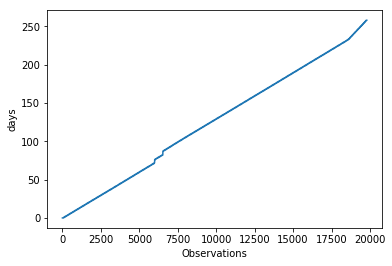

In [10]:
days = df[df.bird_name == "Eric"].days
plt.plot(range(len(days)), days)
plt.xlabel("Observations")
plt.ylabel("days")

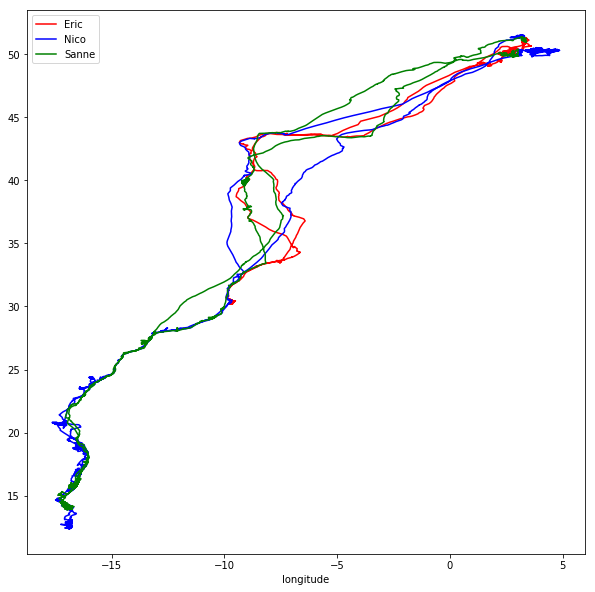

In [11]:
cmap = {"Eric": "red", "Nico": "blue", "Sanne": "green"}
fig, ax = plt.subplots(figsize = (10,10))
for name in df.bird_name.unique():
    df[df.bird_name == name].plot( "longitude", "latitude", color = cmap[name], ax = ax, label = name)
plt.legend()

In [12]:
sanne = df[df.bird_name == "Sanne"]
sanne.date_time.describe()

count                   21004
unique                  21004
top       2014-01-09 06:55:33
freq                        1
first     2013-08-15 00:01:08
last      2014-04-30 23:59:34
Name: date_time, dtype: object

In [13]:
df["date_time"] = pd.to_datetime(df.date_time)
df.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,days
0,71,2013-08-15 00:18:08,851,-150.469753,49.419859,2.120733,0.150000,Eric,0
1,68,2013-08-15 00:48:07,851,-136.151141,49.419880,2.120746,2.438360,Eric,0
2,68,2013-08-15 01:17:58,851,160.797477,49.420310,2.120885,0.596657,Eric,0
3,73,2013-08-15 01:47:51,851,32.769360,49.420359,2.120859,0.310161,Eric,0
4,69,2013-08-15 02:17:42,851,45.191230,49.420331,2.120887,0.193132,Eric,0


In [14]:
df1 = df.dropna()

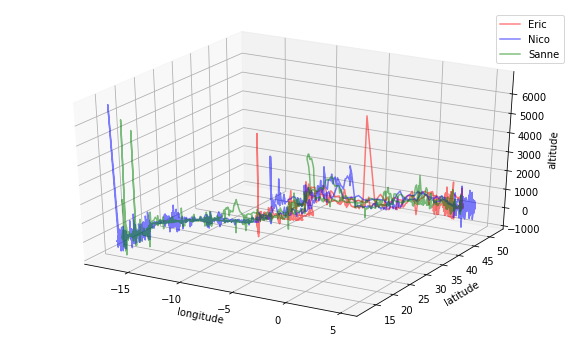

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection='3d')
for name in df.bird_name.unique():
    df1 = df[df.bird_name == name]
    ax.plot(df1.longitude, df1.latitude, df1.altitude, color = cmap[name], label = name, alpha = 0.5)
    ax.set_xlabel("longitude")
    ax.set_ylabel("latitude")
    ax.set_zlabel("altitude")
ax.legend()

In [16]:
df.groupby("bird_name").agg({"altitude": "mean", "speed_2d": "mean"})

,altitude,speed_2d
bird_name,,
Eric,60.249406,2.300545
Nico,67.900478,2.908726
Sanne,29.159922,2.450434


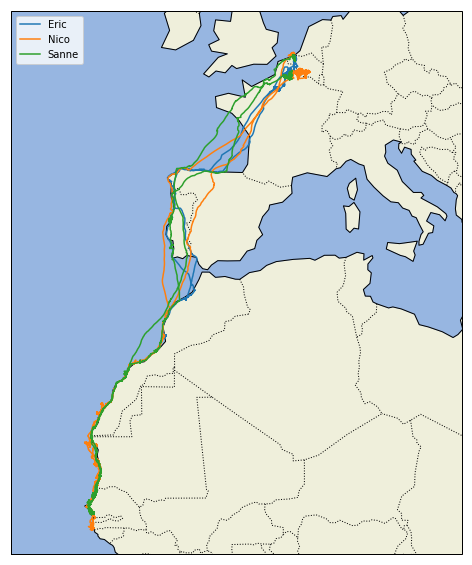

In [17]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()

plt.figure(figsize = (10, 10))
ax = plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS, linestyle = ":")
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)


for name in df.bird_name.unique():
    df1 = df[df.bird_name == name]
    ax.plot(df1.longitude, df1.latitude, transform = ccrs.Geodetic(), label = name)
ax.legend(loc = "upper left")